# Converting Images from Day to Night

First, we load a few experimental images.

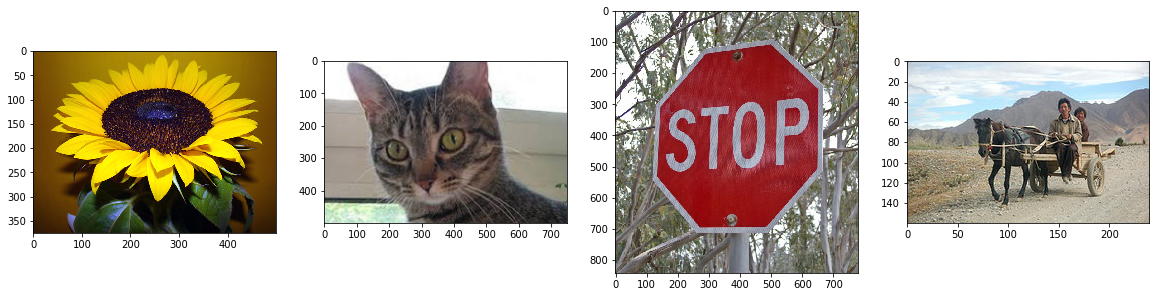

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageEnhance 

sunflower = np.array(plt.imread('C:/Users/johan/Downloads/sunflower.jpg'))
cat = np.array(plt.imread('C:/Users/johan/Downloads/cat.jpg'))
stop = np.array(plt.imread('C:/Users/johan/Downloads/stop_sign.jpg'))
horse = np.array(plt.imread('C:/Users/johan/Downloads/horse.jpg'))

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(sunflower)
axs[1].imshow(cat)  
axs[2].imshow(stop)
axs[3].imshow(horse)

Converting an image from daytime lighting to nighttime lighting consists of several steps: lowering the brightness of the picture, changing the contrast and decreasing the whiteness. We make a simple implementation to try out the single steps and analyse what factors we can later use for an adversarial attack. Generally, the limits will only be set by what we feel is still a valid image and not too dark/disturbed.

For implementing the brightness, we calculate the brightness for every pixel. If it is over a certain threshold, we scale the brightness of the pixel down by some factor.

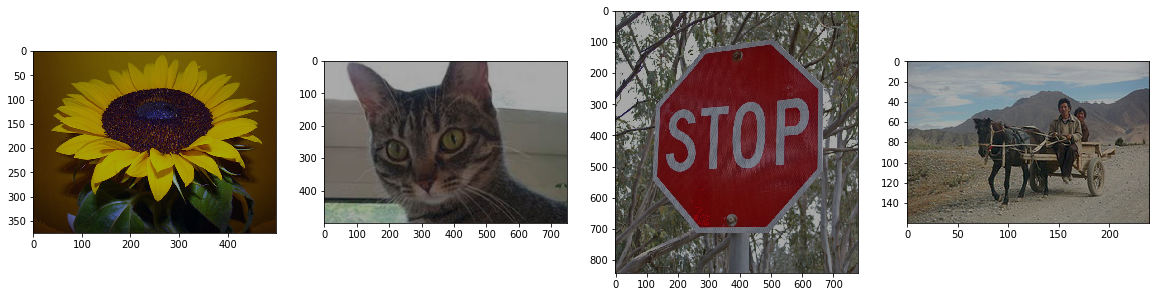

In [2]:
def brightness(img, threshold):
    for i, x in enumerate(img):
        for k, y in enumerate(x):
            brightness = 0.2126*y[0] + 0.7152*y[1] + 0.0722*y[2]
            img[i][k] = y/1.5 if brightness > threshold else img[i][k]   
    return img

images_b = [sunflower, cat, stop, horse]
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(0, 4):
    axs[i].imshow(brightness(images_b[i], 35))    

Next, we implement a function to decrease the contrast of the image, as it is usually the case for images at nighttime. 

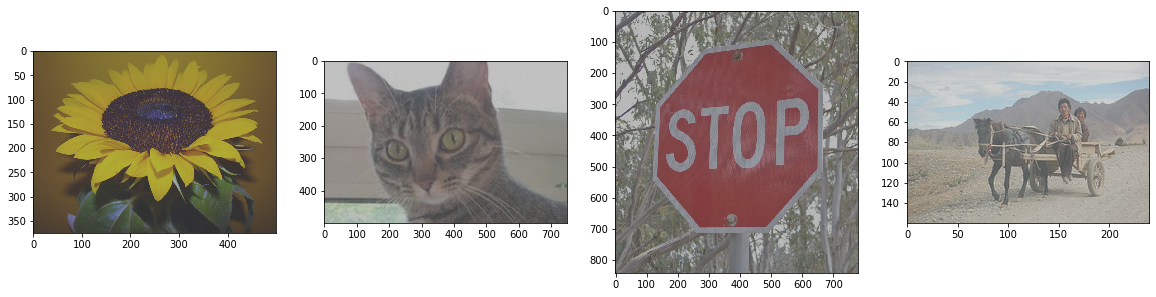

In [6]:
def contrast(img):
    im = Image.fromarray(img)
    new = ImageEnhance.Contrast(im).enhance(0.5) 
    return new

images_c = [sunflower, cat, stop, horse]
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(0, 4):
    axs[i].imshow(contrast(images_c[i]))    

Lastly, we implement a function to decrease the number of white pixels in the image. 

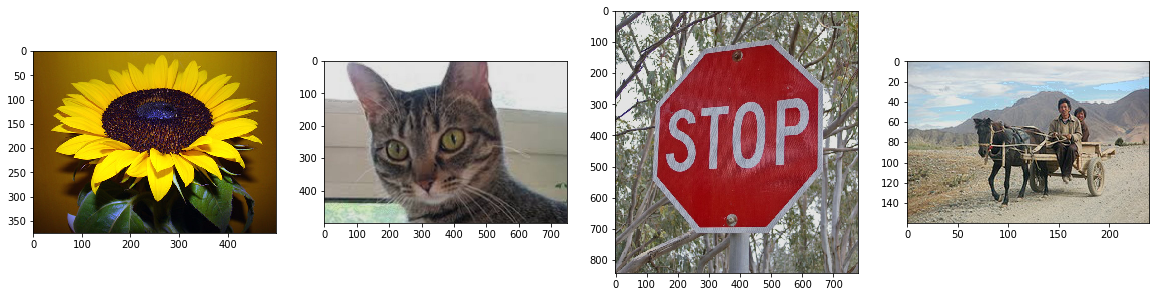

In [8]:
def whiteness(imnew):
    for i, x in enumerate(imnew):
        for k, y in enumerate(x):
            if np.all(y > 180):
                imnew[i][k] = y * 0.90
    return imnew

images_w = [sunflower, cat, stop, horse]
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
for i in range(0, 4):
    axs[i].imshow(whiteness(images_w[i]))    